In [1]:
#!pip install emoji
#importing packeges
import pandas as pd
import numpy as np
import emoji

In [2]:
train=pd.read_csv(r'train_emoji.csv',header=None)
test=pd.read_csv(r'test_emoji.csv',header=None)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 4 columns):
0    132 non-null object
1    132 non-null int64
2    0 non-null float64
3    12 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ KB


In [4]:
train.head()

,0,1,2,3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN


In [5]:
data=train.values

In [6]:
data.shape

(132, 4)

In [7]:
#emojis :
emoji.EMOJI_UNICODE

{':1st_place_medal:': '🥇',
 ':2nd_place_medal:': '🥈',
 ':3rd_place_medal:': '🥉',
 ':AB_button_(blood_type):': '🆎',
 ':ATM_sign:': '🏧',
 ':A_button_(blood_type):': '🅰',
 ':Afghanistan:': '🇦🇫',
 ':Albania:': '🇦🇱',
 ':Algeria:': '🇩🇿',
 ':American_Samoa:': '🇦🇸',
 ':Andorra:': '🇦🇩',
 ':Angola:': '🇦🇴',
 ':Anguilla:': '🇦🇮',
 ':Antarctica:': '🇦🇶',
 ':Antigua_&_Barbuda:': '🇦🇬',
 ':Aquarius:': '♒',
 ':Argentina:': '🇦🇷',
 ':Aries:': '♈',
 ':Armenia:': '🇦🇲',
 ':Aruba:': '🇦🇼',
 ':Ascension_Island:': '🇦🇨',
 ':Australia:': '🇦🇺',
 ':Austria:': '🇦🇹',
 ':Azerbaijan:': '🇦🇿',
 ':BACK_arrow:': '🔙',
 ':B_button_(blood_type):': '🅱',
 ':Bahamas:': '🇧🇸',
 ':Bahrain:': '🇧🇭',
 ':Bangladesh:': '🇧🇩',
 ':Barbados:': '🇧🇧',
 ':Belarus:': '🇧🇾',
 ':Belgium:': '🇧🇪',
 ':Belize:': '🇧🇿',
 ':Benin:': '🇧🇯',
 ':Bermuda:': '🇧🇲',
 ':Bhutan:': '🇧🇹',
 ':Bolivia:': '🇧🇴',
 ':Bosnia_&_Herzegovina:': '🇧🇦',
 ':Botswana:': '🇧🇼',
 ':Bouvet_Island:': '🇧🇻',
 ':Brazil:': '🇧🇷',
 ':British_Indian_Ocean_Territory:': '🇮🇴',
 ':British_Virgin_Is

In [8]:
#label => emoji dict
emoji_dict={"0": "\u2764\uFE0F",    # :heart: prints a black instead of red heart depending on the font
                    "1": ":baseball:",
                    "2": ":beaming_face_with_smiling_eyes:",
                    "3": ":downcast_face_with_sweat:",
                    "4": ":fork_and_knife:"}

In [9]:
for emo in emoji_dict.values():
    print(emoji.emojize(emo))

❤️
⚾
😁
😓
🍴


In [10]:
x=data[:,0]

In [11]:
x.shape

(132,)

In [12]:
y=data[:,1]

In [13]:
y.shape

(132,)

In [14]:
##try
for i in np.random.randint(0,50,10):
    print(f"The emoji of  : {x[i]} is : {emoji.emojize(emoji_dict[str(y[i])])}")

The emoji of  : no one likes him is : 😓
The emoji of  : you got a down grade is : 😓
The emoji of  : I am proud of your achievements is : 😁
The emoji of  : my code is working but the grader gave me zero is : 😓
The emoji of  : I want to go play is : ⚾
The emoji of  : we made it is : 😁
The emoji of  : I want to go play is : ⚾
The emoji of  : we made it is : 😁
The emoji of  : he is laughing is : 😁
The emoji of  : I love you mum is : ❤️


In [15]:
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.


In [16]:
##using glove vectors
def get_embedding():
    embeddings={}
    with open("glove.6B.50d.txt",encoding='utf-8') as f:
         for line in f :
            word=line.split()[0]
            vec=line.split()[1:]
            embeddings[word]=np.array(vec,dtype='float32')
    return embeddings

In [17]:
embedding=get_embedding()

In [18]:
embedding['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
      dtype=float32)

In [19]:
##cleaning text
import re
def clean_text(text):
    text=text.lower()
    text=re.sub('[^a-z]+'," ",text)
    return text
    

In [20]:
x=[clean_text(i) for i in x]

In [21]:
x

['never talk to me again',
 'i am proud of your achievements',
 'it is the worst day in my life',
 'miss you so much',
 'food is life',
 'i love you mum',
 'stop saying bullshit',
 'congratulations on your acceptance',
 'the assignment is too long ',
 'i want to go play',
 'she did not answer my text ',
 'your stupidity has no limit',
 'how many points did he score',
 'my algorithm performs poorly',
 'i got approved',
 'stop shouting at me',
 'sounds like a fun plan ha ha',
 'no one likes him',
 'the game just finished',
 'i will celebrate soon',
 'so sad you are not coming',
 'she is my dearest love',
 'good job',
 'it was funny lol',
 'candy is life ',
 'the chicago cubs won again',
 'i am hungry',
 'i am so excited to see you after so long',
 'you did well on you exam',
 'lets brunch some day',
 'he is so cute',
 'how dare you ask that',
 'do you want to join me for dinner ',
 'i said yes',
 'she is attractive',
 'you suck',
 'she smiles a lot',
 'he is laughing',
 'she takes foreve

In [22]:
max_len=0
for i in range(len(x)):
    max_len=max(max_len,len(x[i].split()))

In [23]:
max_len

10

In [24]:
from keras.utils import to_categorical
y=to_categorical(y)

In [25]:
## embed out_put
def get_output_embed(x,embed,max_len,dim):
    embed_matrix=np.zeros((len(x),max_len,dim))
    for i in range(len(x)):
        l=len(x[i].split())
        for j in range(l):
            embed_matrix[i][j]=embed[x[i].split()[j]]
    return embed_matrix

In [26]:
emb_x=get_output_embed(x,embedding,max_len,50)

In [27]:
from keras.layers import *
from keras.models import Sequential

In [28]:
# Model Architecture
model=Sequential()
model.add(LSTM(64,input_shape=(10,50),return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(256))
model.add(Dense(56,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 64)            29440     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 128)           98816     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dense_1 (Dense)              (None, 56)                14392     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                

In [29]:
from keras.callbacks import ModelCheckpoint
m=ModelCheckpoint(monitor='val_accuracy',save_best_only=True,filepath='best_model.h5')
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [30]:
his=model.fit(emb_x,y,batch_size=32,epochs=50,shuffle=True,validation_split=0.2,callbacks=[m])

Train on 105 samples, validate on 27 samples
Epoch 1/50
105/105 [==============================] - 4s 34ms/step - loss: 1.5899 - accuracy: 0.3048 - val_loss: 1.6387 - val_accuracy: 0.1852
Epoch 2/50
105/105 [==============================] - 0s 3ms/step - loss: 1.5144 - accuracy: 0.3143 - val_loss: 1.7674 - val_accuracy: 0.2222
Epoch 3/50
105/105 [==============================] - 0s 4ms/step - loss: 1.4682 - accuracy: 0.3429 - val_loss: 1.6368 - val_accuracy: 0.2222
Epoch 4/50
105/105 [==============================] - 0s 4ms/step - loss: 1.3923 - accuracy: 0.4286 - val_loss: 1.6134 - val_accuracy: 0.2222
Epoch 5/50
105/105 [==============================] - 0s 4ms/step - loss: 1.3036 - accuracy: 0.4476 - val_loss: 1.6539 - val_accuracy: 0.2222
Epoch 6/50
105/105 [==============================] - 0s 4ms/step - loss: 1.1864 - accuracy: 0.5048 - val_loss: 1.7713 - val_accuracy: 0.2963
Epoch 7/50
105/105 [==============================] - 0s 4ms/step - loss: 1.0748 - accuracy: 0.6095 - 

In [31]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.plot(his.history['val_loss'],label='val_loss')
plt.plot(his.history['loss'],label='label')
plt.legend()
plt.show()

<Figure size 800x550 with 1 Axes>

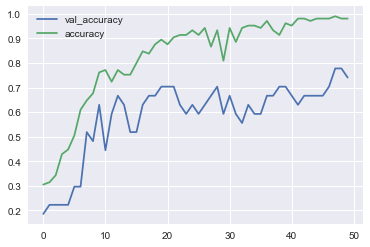

In [32]:
plt.plot(his.history['val_accuracy'],label='val_accuracy')
plt.plot(his.history['accuracy'],label='accuracy')
plt.legend()
plt.show()

In [33]:
test=test.values

In [34]:
xt=test[:,0]
yt=test[:,1]

In [35]:
yt=to_categorical(yt)
xT=[clean_text(i) for i in xt]
xt=get_output_embed(xT,embedding,10,50)

In [36]:
from keras.models import load_model

In [37]:
model=load_model("best_model.h5")

In [38]:
Y=model.predict(xt)

In [42]:
## Testing 
for i in np.random.randint(0,30,30):
    print(xT[i])
    print(emoji.emojize(emoji_dict[str(np.argmax(Y[i]))]))

why are you feeling bad 
😓
he got a raise 
😁
stop messing around 
😓
any suggestions for dinner 
🍴
let us go play baseball 
⚾
where is the ball 
⚾
where is the food 
🍴
stop making this joke ha ha ha 
😁
why are you feeling bad 
😓
are you serious ha ha 
❤️
work is hard 
😁
i want to eat 
🍴
i want to eat 
🍴
i want to eat 
🍴
valentine day is near 
😁
why are you feeling bad 
😓
i am upset 
⚾
valentine day is near 
😁
any suggestions for dinner 
🍴
i want to eat 
🍴
i boiled rice 
🍴
he is a good friend 
😁
work is horrible 
😁
she is a bully 
❤️
you brighten my day 
😓
stop messing around 
😓
i boiled rice 
🍴
work is hard 
😁
i am upset 
⚾
this girl is messing with me 
❤️
